In [83]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import pickle

In [87]:
df = pd.read_csv('datasets_117_1001_responses.csv')

In [88]:
pd.options.display.max_columns=None

In [89]:
df.head()

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.

In [90]:
survey_df = df.copy()

In [91]:
smoking = ['never smoked', 'tried smoking', 'former smoker', 'current smoker']


In [92]:
survey_df['Smoking'] = df.Smoking.astype('category',categories=smoking).cat.codes

In [93]:
print(survey_df['Alcohol'].unique())
print(survey_df['Punctuality'].unique())
print(survey_df['Lying'].unique())
print(survey_df['Internet_usage'].unique())
print(survey_df['Gender'].unique())
print(survey_df['Left_right_handed'].unique())
print(survey_df['Education'].unique())
print(survey_df['Only_child'].unique())
print(survey_df['Village_town'].unique())
print(survey_df['House_block_of_flats'].unique())

['drink a lot' 'social drinker' 'never' nan]
['i am always on time' 'i am often early' 'i am often running late' nan]
['never' 'sometimes' 'only to avoid hurting someone'
 'everytime it suits me' nan]
['few hours a day' 'most of the day' 'less than an hour a day'
 'no time at all']
['female' 'male' nan]
['right handed' 'left handed' nan]
['college/bachelor degree' 'secondary school' 'primary school'
 'masters degree' 'doctorate degree' 'currently a primary school pupil'
 nan]
['no' 'yes' nan]
['village' 'city' nan]
['block of flats' 'house/bungalow' nan]


In [9]:
alcohol=['drink a lot', 'social drinker', 'never']
punctuality=['i am always on time' ,'i am often early', 'i am often running late']
lying=['never' ,'sometimes' ,'only to avoid hurting someone','everytime it suits me']
internet=['few hours a day' ,'most of the day' ,'less than an hour a day','no time at all']
gender=['female' ,'male']
left_right_handed=['right handed' ,'left handed']
education=['college/bachelor degree' ,'secondary school','primary school','masters degree' ,'doctorate degree' ,'currently a primary school pupil']
only_child=['no' ,'yes']
village_town=['village', 'city']
house_block_of_flats=['block of flats' ,'house/bungalow']

In [10]:
survey_df['Alcohol'] = df.Alcohol.astype('category',categories=alcohol).cat.codes
survey_df['Punctuality'] = df.Punctuality.astype('category',categories=punctuality).cat.codes
survey_df['Lying'] = df.Lying.astype('category',categories=lying).cat.codes
survey_df['Internet_usage'] = df.Internet_usage.astype('category',categories=internet).cat.codes
survey_df['Education'] = df.Education.astype('category',categories=education).cat.codes
survey_df['Gender'] = df.Gender.astype('category',categories=gender).cat.codes
survey_df['Left_right_handed'] = df.Left_right_handed.astype('category',categories=left_right_handed).cat.codes
survey_df['Only_child'] = df.Only_child.astype('category',categories=only_child).cat.codes
survey_df['Village_town'] = df.Village_town.astype('category',categories=village_town).cat.codes
survey_df['House_block_of_flats'] = df.House_block_of_flats.astype('category',categories=house_block_of_flats).cat.codes

In [11]:
survey_df.head()

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,0,0,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,0,0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,0,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,0,0,0,0,0,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,0,0,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,1,1,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,0,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,0,0,0,0,1,0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,1,0,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,2,1,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,0,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,0,0,1,0,1,0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,5.0,4.0,4.0,2.0,5.0,1.0,5.0,4.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,5.0,5,5.0,4.0,5.0,5.0,2,0,3.0,4.0,4.0,4.0,5.0,3.0,1.0,3.0,4.0,5.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,3.0,3.0,1,1.0,2.0,5.0,5.0,5.0,1.0,5.0,4.0,3,3.

In [12]:
clean_df = survey_df.copy()

In [13]:
clean_df = clean_df.dropna()

In [14]:
clean_df.to_csv (r'C:\Users\obehi\Desktop\Young people survey.csv',index = False, header = True )

In [15]:
Dance_music = clean_df.groupby(['Dance']).mean()

In [16]:
Dance_music.head()

,Music,Slow_songs_or_fast_songs,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
Dance,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,4.638889,3.208333,2.069444,1.986111,3.180556,2.333333,2.250000,3.888889,3.041667,2.569444,1.819444,2.236111,2.263889,3.027778,3.027778,1.916667,1.486111,2.305556,4.555556,2.638889,3.263889,4.236111,2.972222,2.972222,3.388889,3.666667,3.791667,3.750000,2.208333,3.305556,3.513889,3.125000,2.722222,2.125000,1.916667,4.027778,2.972222,2.263889,2.305556,1.819444,3.430556,3.208333,3.652778,2.250000,2.083333,2.083333,2.611111,2.180556,3.791667,1.791667,2.541667,2.083333,3.222222,2.652778,1.875000,1.722222,2.513889,3.013889,3.111111,4.194444,2.291667,3.152778,1.652778,1.652778,2.305556,2.500000,3.013889,2.819444,1.916667,2.236111,2.750000,2.791667,1.291667,0.958333,2.763889,2.902778,2.597222,2.861111,2.916667,3.541667,2.347222,3.777778,4.000000,2.750000,3.819444,3.097222,2.222222,2.666667,3.291667,3.277778,3.583333,3.930556,1.916667,3.694444,2.180556,2.500000,4.083333,4.055556,3.000000,3.583333,2.986111,2.763889,2.902778,3.263889,2.069444,3.083333,0.902778,1.472222,2.666667,3.430556,3.347222,3.319444,2.777778,2.958333,3.263889,3.402778,3.333333,3.111111,3.152778,3.500000,3.236111,2.861111,3.500000,3.180556,3.236111,3.097222,3.111111,3.666667,3.430556,3.138889,2.694444,0.347222,3.111111,2.625000,2.847222,3.180556,2.680556,2.638889,3.555556,19.944444,175.236111,66.222222,1.347222,0.430556,0.111111,1.055556,0.208333,0.750000,0.291667
2.0,4.712418,3.189542,2.209150,2.169935,3.183007,2.836601,3.000000,4.196078,2.771242,2.862745,2.411765,2.777778,2.973856,3.411765,3.294118,2.411765,1.771242,2.398693,4.568627,2.601307,3.307190,4.444444,3.274510,3.261438,3.235294,3.555556,3.562092,3.718954,2.124183,3.450980,3.320261,3.228758,2.777778,2.437908,2.098039,4.228758,3.261438,2.594771,2.490196,2.039216,3.457516,3.137255,3.862745,2.457516,2.326797,2.535948,2.777778,2.117647,3.509804,1.928105,2.372549,2.039216,3.294118,3.065359,1.823529,2.169935,2.973856,3.418301,2.973856,4.418301,2.790850,3.313725,2.006536,1.836601,2.169935,2.542484,2.503268,2.732026,2.026144,2.457516,2.88

In [17]:
Horror_movie = clean_df.groupby(['Horror']).mean()

In [18]:
Horror_movie.head()

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
Horror,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,4.775862,3.252874,2.977011,2.482759,2.120690,3.212644,2.942529,3.482759,3.856322,2.344828,2.431034,2.597701,2.706897,2.885057,3.126437,2.965517,3.022989,2.201149,2.316092,4.534483,2.603448,4.402299,3.574713,2.867816,2.856322,4.005747,3.885057,3.810345,1.994253,3.477011,3.229885,3.172414,2.522989,2.298851,2.011494,4.022989,2.712644,2.557471,2.816092,2.281609,3.574713,3.206897,3.890805,2.534483,2.103448,2.275862,2.752874,2.459770,3.781609,2.603448,2.356322,1.816092,3.201149,3.051724,2.086207,2.206897,3.293103,3.114943,3.252874,4.482759,2.517241,3.402299,2.097701,2.063218,2.339080,2.545977,2.925287,3.241379,2.339080,2.327586,3.109195,2.844828,1.086207,0.902299,2.988506,2.982759,2.563218,3.310345,3.017241,3.494253,2.528736,3.844828,3.971264,2.787356,3.873563,3.126437,2.040230,2.350575,3.356322,3.557471,3.827586,4.000000,1.850575,3.896552,1.936782,2.798851,3.873563,4.109195,2.867816,3.494253,3.160920,2.844828,3.494253,3.350575,2.057471,3.252874,0.896552,1.362069,2.649425,3.522989,3.327586,3.683908,2.965517,2.879310,3.241379,3.672414,3.534483,3.172414,3.333333,3.597701,3.505747,3.327586,3.775862,3.586207,2.873563,3.235632,3.011494,3.465517,3.471264,3.419540,2.770115,0.477011,3.137931,3.247126,2.890805,2.936782,3.011494,2.586207,3.545977,20.034483,172.206897,63.229885,1.321839,0.270115,0.080460,0.982759,0.264368,0.683908,0.454023
2.0,4.722222,3.173611,3.055556,2.208333,2.055556,2.902778,2.784722,3.423611,3.763889,2.180556,2.277778,2.812500,2.715278,2.756944,3.111111,2.777778,2.798611,2.229167,2.055556,4.541667,2.937500,4.465278,3.541667,3.013889,3.097222,3.645833,3.638889,3.555556,2.131944,3.416667,3.138889,3.145833,2.576389,2.451389,2.229167,4.215278,3.111111,2.611111,2.638889,2.159722,3.138889,3.166667,3.833333,2.631944,2.152778,2.534722,2.590278,2.284722,3.625000,2.458333,2.347222,1.895833,3.305556,3.305556,1.826389,2.423611,3.215278,3.277778,3.027778,4.548611,2.937500,3.111111,1.923611,1.993056,2.347222,2.666667,2.763889,2.965278,2.319444,2.666667,3.08

In [19]:
scaler = StandardScaler()
clean_df_std = scaler.fit_transform(clean_df)

In [20]:
hier_clust = linkage(clean_df_std, method='ward')

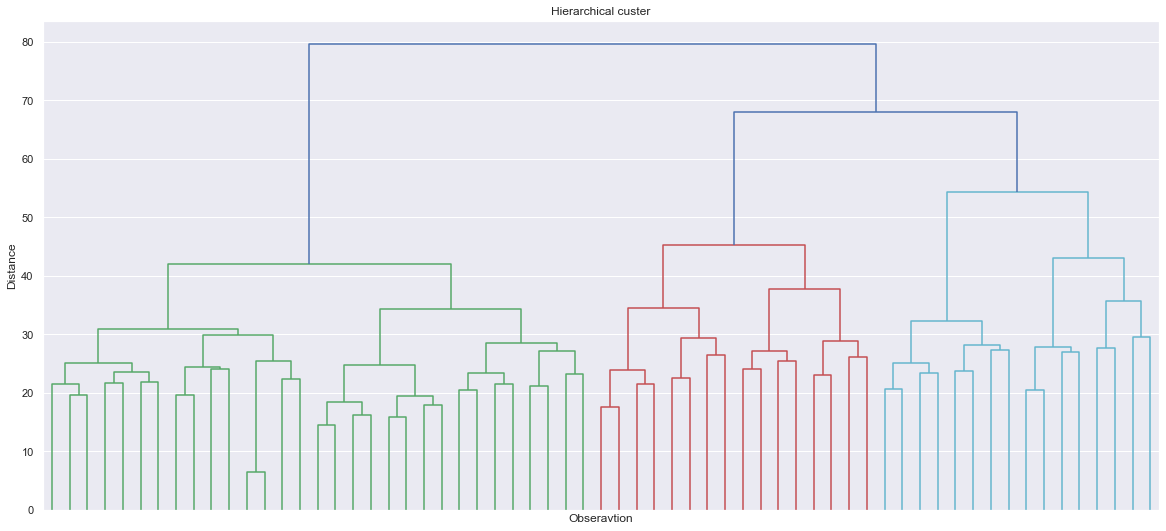

In [21]:
plt.figure(figsize=(20,9))
plt.title('Hierarchical custer')
plt.xlabel('Obseravtion')
plt.ylabel('Distance')
dendrogram(hier_clust,
          truncate_mode = 'level',
          p=5,
          show_leaf_counts = False,
          no_labels = True)
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [23]:
kmeans.fit(clean_df_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [65]:
df_segm_kmeans = clean_df.copy()

In [66]:
df_segm_kmeans['segment K-means'] = kmeans.labels_

In [67]:
df_segm_kmeans.head()

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats,segment K-means
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,0,0,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,0,0,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,0,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,0,0,0,0,0,0,0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,0,0,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,1,1,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,0,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,0,0,0,0,1,0,1
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,1,0,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,2,1,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,0,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,0,0,1,0,1,0,2
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,5.0,2.0,3.0,3.0,2.0,3.0,1.0,4.0,4.0,1.0,3.0,1.0,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1,2.0,2.0,4.0,3.0,1,1,4.0,3.0,1.0,2.0,3.0,5.0,5.0,5.0,4.0,2.0,3.0,3.0,2.0,1.0,3.0,5.0,5.0,5.0,1.0,3.0,1,3.0,3.0,4.0,3.

In [70]:
df_segm_analysis = df_segm_kmeans.groupby(['segment K-means']).mean()

In [71]:
df_segm_analysis.head()

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
segment K-means,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.824373,3.236559,3.243728,2.103943,1.845878,2.677419,2.878136,3.792115,3.612903,1.874552,2.157706,2.899642,2.637993,2.537634,2.967742,2.616487,3.068100,2.161290,1.878136,4.652330,2.573477,3.186380,4.591398,4.028674,2.594982,2.609319,4.136201,4.032258,3.207885,1.559140,3.086022,2.831541,3.082437,2.172043,1.939068,1.508961,4.125448,2.487455,2.566308,2.648746,1.992832,3.405018,2.842294,3.903226,2.426523,2.014337,2.075269,2.551971,2.060932,3.605735,2.688172,2.089606,1.741935,3.268817,2.802867,1.996416,2.777778,3.924731,2.551971,3.164875,4.577061,2.372760,3.637993,2.279570,2.408602,2.817204,2.763441,3.544803,3.562724,2.924731,2.863799,3.415771,3.114695,1.293907,0.928315,3.003584,2.813620,2.562724,3.207885,2.777778,3.172043,2.713262,3.802867,3.885305,2.695341,3.810036,3.093190,2.089606,2.304659,3.362007,3.297491,3.645161,3.985663,2.003584,4.057348,2.025090,3.086022,4.290323,4.082437,2.967742,3.856631,3.433692,3.043011,3.415771,3.240143,1.863799,3.222222,0.921147,1.415771,2.602151,3.318996,3.462366,3.759857,3.053763,3.021505,3.078853,3.770609,3.279570,3.207885,3.372760,3.946237,3.476703,3.824373,3.598566,3.483871,2.652330,3.222222,2.838710,3.827957,3.157706,3.293907,2.863799,0.451613,3.035842,3.648746,2.924731,2.985663,3.318996,2.462366,3.426523,20.014337,168.197133,57.985663,1.200717,0.028674,0.068100,1.121864,0.240143,0.716846,0.408602
1,4.630841,3.471963,2.892523,1.934579,2.051402,2.626168,2.060748,3.065421,3.831776,2.761682,2.616822,3.009346,2.757009,2.439252,2.976636,2.794393,2.084112,2.490654,1.771028,4.584112,3.084112,3.640187,4.462617,2.649533,3.612150,3.747664,3.172897,3.355140,3.700935,2.546729,4.107477,3.172897,2.672897,2.714953,2.640187,2.434579,4.364486,3.859813,2.640187,2.079439,1.892523,2.401869,3.018692,3.369159,2.009346,2.112150,3.289720,1.883178,1.789720,3.210280,1.551402,1.873832,1.509346,3.523364,3.448598,1.397196,1.873832,2.429907,3.691589,2.140187,4.467290,3.168224,2.873832,1.738318,1.443925,1.682243,2.500000,2.186916,

In [73]:
df_segm_analysis['N obs'] = df_segm_kmeans[['segment K-means','Music']].groupby(['segment K-means']).count()

In [74]:
df_segm_analysis['Prop obs'] = df_segm_analysis['N obs']/df_segm_analysis['N obs'].sum()

In [77]:
df_segm_analysis

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats,N obs,Prop obs
segment K-means,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4.824373,3.236559,3.243728,2.103943,1.845878,2.677419,2.878136,3.792115,3.612903,1.874552,2.157706,2.899642,2.637993,2.537634,2.967742,2.616487,3.068100,2.161290,1.878136,4.652330,2.573477,3.186380,4.591398,4.028674,2.594982,2.609319,4.136201,4.032258,3.207885,1.559140,3.086022,2.831541,3.082437,2.172043,1.939068,1.508961,4.125448,2.487455,2.566308,2.648746,1.992832,3.405018,2.842294,3.903226,2.426523,2.014337,2.075269,2.551971,2.060932,3.605735,2.688172,2.089606,1.741935,3.268817,2.802867,1.996416,2.777778,3.924731,2.551971,3.164875,4.577061,2.372760,3.637993,2.279570,2.408602,2.817204,2.763441,3.544803,3.562724,2.924731,2.863799,3.415771,3.114695,1.293907,0.928315,3.003584,2.813620,2.562724,3.207885,2.777778,3.172043,2.713262,3.802867,3.885305,2.695341,3.810036,3.093190,2.089606,2.304659,3.362007,3.297491,3.645161,3.985663,2.003584,4.057348,2.025090,3.086022,4.290323,4.082437,2.967742,3.856631,3.433692,3.043011,3.415771,3.240143,1.863799,3.222222,0.921147,1.415771,2.602151,3.318996,3.462366,3.759857,3.053763,3.021505,3.078853,3.770609,3.279570,3.207885,3.372760,3.946237,3.476703,3.824373,3.598566,3.483871,2.652330,3.222222,2.838710,3.827957,3.157706,3.293907,2.863799,0.451613,3.035842,3.648746,2.924731,2.985663,3.318996,2.462366,3.426523,20.014337,168.197133,57.985663,1.200717,0.028674,0.068100,1.121864,0.240143,0.716846,0.408602,279,0.406706
1,4.630841,3.471963,2.892523,1.934579,2.051402,2.626168,2.060748,3.065421,3.831776,2.761682,2.616822,3.009346,2.757009,2.439252,2.976636,2.794393,2.084112,2.490654,1.771028,4.584112,3.084112,3.640187,4.462617,2.649533,3.612150,3.747664,3.172897,3.355140,3.700935,2.546729,4.107477,3.172897,2.672897,2.714953,2.640187,2.434579,4.364486,3.859813,2.640187,2.079439,1.892523,2.401869,3.018692,3.369159,2.009346,2.112150,3.289720,1.883178,1.789720,3.210280,1.551402,1.873832,1.509346,3.523364,3.448598,1.397196,1.873832,2.429907,3.691589,2.140187,4.467290,3.168224,2.873832,1.738318,1.4439

In [79]:
df_segm_analysis.rename({0:'A',
                         1:'B', 
                         2:'C'})

,Music,Slow_songs_or_fast_songs,Dance,Folk,Country,Classical_music,Musical,Pop,Rock,Metal_or_Hardrock,Punk,Hiphop_Rap,Reggae_Ska,Swing_Jazz,Rock_n_roll,Alternative,Latino,Techno_Trance,Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy_Management,Biology,Chemistry,Reading,Geography,Foreign_languages,Medicine,Law,Cars,Art_exhibitions,Religion,Countryside_outdoors,Dancing,Musical_instruments,Writing,Passive_sport,Active_sport,Gardening,Celebrities,Shopping,Science_and_technology,Theatre,Fun_with_friends,Adrenaline_sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous_dogs,Fear_of_public_speaking,Smoking,Alcohol,Healthy_eating,Daily_events,Prioritising_workload,Writing_notes,Workaholism,Thinking_ahead,Final_judgement,Reliability,Keeping_promises,Loss_of_interest,Friends_versus_money,Funniness,Fake,Criminal_damage,Decision_making,Elections,Self-criticism,Judgment_calls,Hypochondria,Empathy,Eating_to_survive,Giving,Compassion_to_animals,Borrowed_stuff,Loneliness,Cheating_in_school,Health,Changing_the_past,God,Dreams,Charity,Number_of_friends,Punctuality,Lying,Waiting,New_environment,Mood_ swings,Appearance_and_gestures,Socializing,Achievements,Responding_to_a_serious_letter,Children,Assertiveness,Getting_angry,Knowing the right people,Public_speaking,Unpopularity,Life_struggles,Happiness_in_life,Energy_levels,Small_big_dogs,Personality,Finding_lost_valuables,Getting_up,Interests_or_hobbies,Parents_advice,Questionnaires_or_polls,Internet_usage,Finances,Shopping_centres,Branded_clothing,Entertainment_spending,Spending_on_looks,Spending_on_gadgets,Spending_on_healthy_eating,Age,Height,Weight,Number_of_siblings,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats,N obs,Prop obs
segment K-means,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,4.824373,3.236559,3.243728,2.103943,1.845878,2.677419,2.878136,3.792115,3.612903,1.874552,2.157706,2.899642,2.637993,2.537634,2.967742,2.616487,3.068100,2.161290,1.878136,4.652330,2.573477,3.186380,4.591398,4.028674,2.594982,2.609319,4.136201,4.032258,3.207885,1.559140,3.086022,2.831541,3.082437,2.172043,1.939068,1.508961,4.125448,2.487455,2.566308,2.648746,1.992832,3.405018,2.842294,3.903226,2.426523,2.014337,2.075269,2.551971,2.060932,3.605735,2.688172,2.089606,1.741935,3.268817,2.802867,1.996416,2.777778,3.924731,2.551971,3.164875,4.577061,2.372760,3.637993,2.279570,2.408602,2.817204,2.763441,3.544803,3.562724,2.924731,2.863799,3.415771,3.114695,1.293907,0.928315,3.003584,2.813620,2.562724,3.207885,2.777778,3.172043,2.713262,3.802867,3.885305,2.695341,3.810036,3.093190,2.089606,2.304659,3.362007,3.297491,3.645161,3.985663,2.003584,4.057348,2.025090,3.086022,4.290323,4.082437,2.967742,3.856631,3.433692,3.043011,3.415771,3.240143,1.863799,3.222222,0.921147,1.415771,2.602151,3.318996,3.462366,3.759857,3.053763,3.021505,3.078853,3.770609,3.279570,3.207885,3.372760,3.946237,3.476703,3.824373,3.598566,3.483871,2.652330,3.222222,2.838710,3.827957,3.157706,3.293907,2.863799,0.451613,3.035842,3.648746,2.924731,2.985663,3.318996,2.462366,3.426523,20.014337,168.197133,57.985663,1.200717,0.028674,0.068100,1.121864,0.240143,0.716846,0.408602,279,0.406706
B,4.630841,3.471963,2.892523,1.934579,2.051402,2.626168,2.060748,3.065421,3.831776,2.761682,2.616822,3.009346,2.757009,2.439252,2.976636,2.794393,2.084112,2.490654,1.771028,4.584112,3.084112,3.640187,4.462617,2.649533,3.612150,3.747664,3.172897,3.355140,3.700935,2.546729,4.107477,3.172897,2.672897,2.714953,2.640187,2.434579,4.364486,3.859813,2.640187,2.079439,1.892523,2.401869,3.018692,3.369159,2.009346,2.112150,3.289720,1.883178,1.789720,3.210280,1.551402,1.873832,1.509346,3.523364,3.448598,1.397196,1.873832,2.429907,3.691589,2.140187,4.467290,3.168224,2.873832,1.738318,1.4439

In [94]:
pickle.dump(scaler, open ('scaler.pickle', 'wb'))

In [95]:
pickle.dump(kmeans, open('kmeans.pickle','wb'))